### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.7MB 60kB/s 
     |████████████████████████████████| 204kB 32.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=98068a89152bd68b6419442c1ae7f914213d072dc9d65710126db152a72a61a5
  Stored in directory: /root/.cache/pip/wheels/57/27/4d/ddacf7143f8d5b76c45c61ee2e43d9f8492fc5a8e78ebd7d37
Successfully built pyspark


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt

creating spark session

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
listening_csv_path = '/content/drive/My Drive/dataset/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show(10)

+-----------+--------------------+------------+--------------------+
|    user_id|               track|      artist|               album|
+-----------+--------------------+------------+--------------------+
|000Silenced|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|            Acapella|       Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|   Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|Napalm Death|Time Waits For No...|
+-----------+--------------------+------------+--------------------+
only showing top 10 rows



let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))

In [ ]:
shape

(13758905, 4)

# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist', 'track')
q0.show(10)

+------------+--------------------+
|      artist|               track|
+------------+--------------------+
|    Jessie J|           Price Tag|
|    Jessie J|Price Tag (Acoust...|
|       Robyn|Be Mine! (Ballad ...|
|       Kelis|            Acapella|
|   The Tease|   I'm Not Invisible|
|    MSTRKRFT|Bounce (Feat NORE...|
|     Rihanna|Don't Stop The Mu...|
|   Meshuggah|               ObZen|
|      Gojira|   Yama's Messengers|
|Napalm Death|On the Brink of E...|
+------------+--------------------+
only showing top 10 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show(10)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
+-----------+--------------------+-------+--------------------+
only showing top 10 rows



**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show(10)

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show(10)

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('track').filter(listening_df.artist == 'Rihanna').groupby('track').agg(count('track').alias('count')).orderBy(desc('count')).limit(10)
q4.show(10)

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
q5 = listening_df.select('artist', 'album').groupby('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_csv_path = '/content/drive/My Drive/dataset/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(genre_csv_path)

let's check the data

In [ ]:
genre_df.show(10)

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
+--------------------+-----+
only showing top 10 rows



In [ ]:
listening_df.show(10)

+-----------+--------------------+------------+--------------------+
|    user_id|               track|      artist|               album|
+-----------+--------------------+------------+--------------------+
|000Silenced|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|            Acapella|       Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|   Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|Napalm Death|Time Waits For No...|
+-----------+--------------------+------------+--------------------+
only showing top 10 rows



Let's inner join these two data frames

In [ ]:
data = listening_df.join(genre_df, how='inner', on=['artist'])
data.show(10)

+--------+-----------+--------------------+-----------+--------------------+
|  artist|    user_id|               track|      album|               genre|
+--------+-----------+--------------------+-----------+--------------------+
|Jessie J|000Silenced|           Price Tag|Who You Are| Ariana Grande & ...|
|Jessie J|000Silenced|           Price Tag|Who You Are| Jhene Aiko & Rixton|
|Jessie J|000Silenced|           Price Tag|Who You Are| Nicki Minaj & Ar...|
|Jessie J|000Silenced|           Price Tag|Who You Are|                 pop|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Ariana Grande & ...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Jhene Aiko & Rixton|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag| Nicki Minaj & Ar...|
|Jessie J|000Silenced|Price Tag (Acoust...|  Price Tag|                 pop|
|   Robyn|000Silenced|Be Mine! (Ballad ...|   Be Mine!|                 pop|
|   Kelis|000Silenced|            Acapella|   Acapella|                 pop|

In [ ]:
(data.count(), len(data.columns))

(17746268, 5)

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id', 'genre').groupby('user_id', 'genre').agg(count('*').alias('count'))
q8_1.show() 

+---------------+--------------------+-----+
|        user_id|               genre|count|
+---------------+--------------------+-----+
|          _0015|     psychedelic pop|    3|
|        01Green|          Maty Noyes|    1|
|      01srainey|            Big Sean|    2|
|      03swalker|                soul|    4|
|        0502008|       Keys N Krates|    2|
|       07berobe|national socialis...|   14|
|       07berobe|        gothic metal|    8|
|          0rdos|              celtic|    1|
|     0xenolith0|       drum and bass|    1|
|10bobrevolution|         000 Fathers|    4|
| 11shadesofgrey|          electronic|    6|
| 11shadesofgrey|             baroque|    1|
|      1337fatal|                jazz|   14|
|        14M5K0T|                jazz|   70|
|          16-19| June Carter & Me...|    1|
|          16-19| Kanye West & Pau...|    1|
|   1888Franklin|               metal|   17|
|           1936|       Woody Jackson|    1|
|       19nick81|             minimal|   42|
|   1Chord

In [ ]:
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max'))
q8_2.show()

+---------------+--------------------+
|        user_id|                 max|
+---------------+--------------------+
|        -Gemma-|   [38, british pop]|
|        247flix|      [78, synthpop]|
|     A3sahaettr|         [60, metal]|
|        AYFBlog|    [98, indie rock]|
|  AdamMcSpaddam|          [79, rock]|
|        Alukarl|   [85, death metal]|
|       Ambalina|           [53, pop]|
|        AndyEgg|          [54, rock]|
| AngerisaGift14|          [58, rock]|
|      Anndddyyy|         [116, rock]|
|     BasilBrush|          [63, rock]|
|     BernieLick|          [70, rock]|
|      Big_Tiger|         [54, indie]|
|          Birks|[36, singer-songw...|
|         BolaJA|          [59, rock]|
|        Boone92|     [46, metalcore]|
|CameronWhittall|           [91, pop]|
|        Ceolmor|    [48, electronic]|
| CheeseMonkey91|           [55, emo]|
|  Chilled-Lemon|         [100, rock]|
+---------------+--------------------+
only showing top 20 rows



In [ ]:
q8_3 = q8_2.select('user_id', 'max.genre')
q8_3.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9 = genre_df.select('genre').filter(data.genre.isin('pop', 'rock', 'metal', 'hip hop')).groupby('genre').agg(count('*').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [ ]:
q9 = genre_df.select('genre').filter((col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')).groupby('genre').agg(count('*').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()

In [ ]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [ ]:
labels

['pop', 'hip hop', 'metal', 'rock']

In [ ]:
counts

[6960, 4288, 1854, 9066]

now lets visualize these two lists using a bar chart

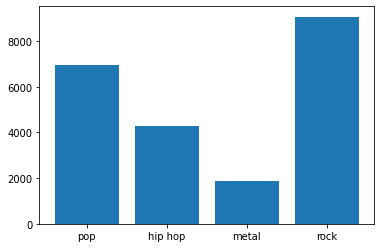

In [ ]:
plt.bar(labels, counts)
plt.show()